In [7]:
from qmio import QmioRuntimeService
from qmiotools.integrations.qiskitqmio import QmioBackend,FakeQmio
from qmiotools.integrations.utils import Calibrations
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [13]:
service = QmioRuntimeService()

# Qubit settings
qubit = 8
nshots = 1000

# Saturation pulse setting
amp = 0.1
duration = 2*3.2e-08 #dt

# Frequency sweep settings
freq_start = 4.25e9
freq_end = 4.45e9
freq_step = 0.001e9
freq_sweep = np.arange(freq_start, freq_end, freq_step)
print(freq_num_steps)

200


In [14]:
def set_instructions(_freq):
    _inst = f'''OPENQASM 3;
    defcalgrammar "openpulse";

    cal {{
        extern frame q{qubit}_drive;
        set_frequency(q{qubit}_drive, {_freq});
    }}

    defcal sat_pulse ${qubit} {{
        waveform wf = constant({duration}, {amp});
        play(q{qubit}_drive, wf);
    }}

    sat_pulse ${qubit};
    measure ${qubit};'''
    return _inst
base = set_instructions(freq_start)
print(base)

OPENQASM 3;
    defcalgrammar "openpulse";

    cal {
        extern frame q8_drive;
        set_frequency(q8_drive, 4250000000.0);
    }

    defcal sat_pulse $8 {
        waveform wf = constant(6.4e-08, 0.1);
        play(q8_drive, wf);
    }

    sat_pulse $8;
    measure $8;


In [16]:
from ipywidgets import IntProgress
from IPython.display import display

bar = IntProgress(min=0, max=len(freq_sweep)) 
display(bar) 

count = 0

results = []
with service.backend(name = "qpu") as backend:
    for f in freq_sweep:
        inst = set_instructions(f)
        res = backend.run(circuit = inst, shots = nshots, res_format = 'raw')
        try :
            res = res["results"]
            results.append(res)
        except :
            print(res)
        bar.value += 1

IntProgress(value=0, max=200)

Waiting for resources


In [17]:
p1 = np.zeros(len(results))
for i in range(len(results)):
    for n in range(nshots):
        if results[i][0][n] < 0:
            p1[i] += 1

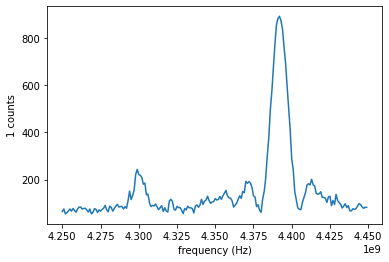

In [18]:
plt.plot(freq_sweep, p1)
plt.ylabel('1 counts')
plt.xlabel('frequency (Hz)')
plt.show()